In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
import glob
import os
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')


# 6.1 
#### Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [2]:
dir='D:\ML&AI internship\module6'
csvfiles = glob.glob(os.path.join(dir, '*.csv'))
df=pd.DataFrame()

In [3]:
for csvfile in csvfiles:
    df2=pd.read_csv(csvfile)
    df2=df2[df2.Series == 'EQ']
    df[os.path.basename(csvfile).split('.')[0]]=df2['Close Price']

In [4]:
df

,APOLLOTYRE,BAJAJELEC,BAJFINANCE,BERGEPAINT,BPCL,CASTROLIND,CIPLA,CUMMINSIND,DHFL,DRREDDY,...,IGL,JETAIRWAYS,JKLAKSHMI,LAXMIMACH,LEMONTREE,LUXIND,MINDAIND,NCC,RCOM,SUZLON
0,231.90,341.15,1332.95,259.50,727.85,449.85,569.00,1066.05,431.40,2675.80,...,1000.25,527.50,510.80,4614.05,71.65,819.60,517.90,97.35,32.00,19.60
1,234.40,347.00,1347.75,261.50,733.30,443.00,565.60,1047.75,NaN,2724.10,...,1005.80,534.15,527.50,4589.80,66.85,817.50,545.60,100.40,32.10,19.70
2,237.35,349.85,1324.80,260.90,727.45,439.55,562.35,1016.45,NaN,2736.90,...,1019.10,528.90,516.20,4637.25,66.95,819.80,560.10,101.45,31.95,19.90
3,232.65,334.10,1314.55,254.10,714.90,433.95,560.10,1054.45,NaN,2678.95,...,1002.55,522.70,478.95,4544.45,66.40,820.05,545.25,97.00,31.05,20.00
4,234.65,336.20,1289.15,247.80,702.45,437.10,564.95,972.95,NaN,2656.45,...,1000.15,520.40,469.55,4522.70,67.70,817.80,560.80,95.45,30.55,20.60
5,233.75,313.25,1242.15,249.15,695.60,424.95,563.10,930.80,NaN,2608.70,...,987.20,475.65,475.75,4462.60,67.25,817.05,564.05,95.25,29.80,20.40
6,230.50,315.55,1233.75,244.10,699.55,411.90,533.20,926.20,NaN,2579.45,...,981.45,472.85,485.60,4371.45,68.50,807.30,552.90,90.95,28.00,19.75
7,221.45,327.95,1224.35,242.45,711.90,418.80,519.65,914.80,NaN,2516.80,...,982.65,464.80,481.90,4360.35,68.05,792.00,555.55,83.25,25.90,18.85
8,226.90,346.20,1258.85,242.65,726.85,414.45,504.00,925.05,NaN,2427.70,...,984.45,468.95,478.05,4405.80,71.85,807.30,568.90,85.85,25.95,19.35
9,232.10,359.45,1317.80,258.00,749.65,420.50,488.90,949.95,NaN,2414.40,...,1026.05,483.40,481.15,4499.05,83.70,811.45,596.15,87.60,25.75,19.80


# 6.2 
#### Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [5]:
df2=pd.DataFrame()
df2['Annual_return']=np.mean(df.pct_change()) * 252
df2['Annual_volatility']=np.std(df.pct_change()) * np.sqrt(252)

In [6]:
df2.iloc[:,0:2]

,Annual_return,Annual_volatility
APOLLOTYRE,-0.064303,0.310130
BAJAJELEC,0.316053,0.402005
BAJFINANCE,0.452758,0.320734
BERGEPAINT,0.108935,0.267396
BPCL,-0.250364,0.435733
CASTROLIND,-0.434559,0.446010
CIPLA,0.021976,0.253925
CUMMINSIND,-0.177629,0.296243
DHFL,0.026687,0.117132
DRREDDY,0.085396,0.297376


# 6.3
#### Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

The **Elbow method** is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.


Explained Variance. The "elbow" is indicated by the red circle. The number of clusters chosen should therefore be 4.
This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

In [7]:
X=df2.iloc[:,0:2].values

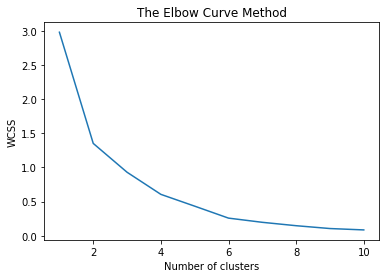

In [8]:
#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append (kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### By seeing the elbow curve we will use 6 clusters.

In [9]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans=kmeans.fit_predict(X)


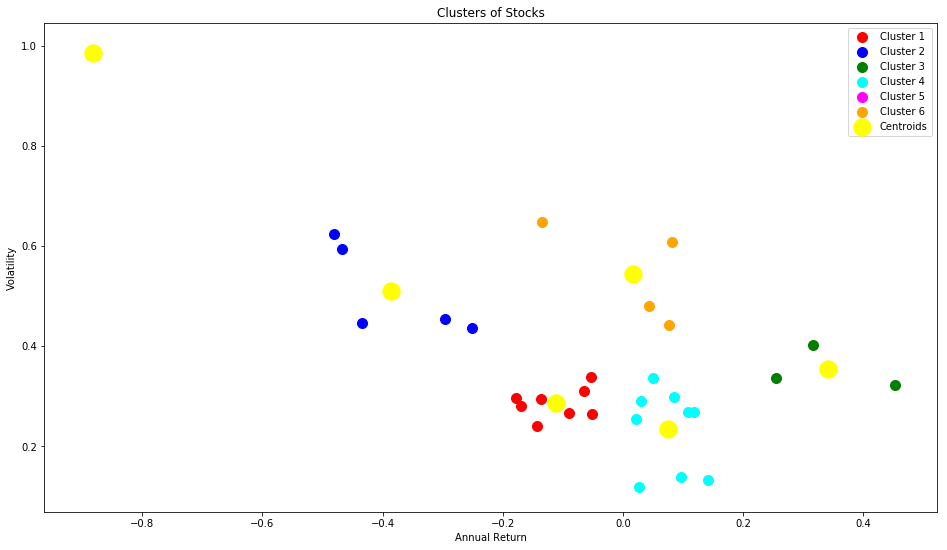

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s= 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Stocks')
plt.xlabel('Annual Return')
plt.ylabel('Volatility')
plt.legend()
plt.rcParams["figure.figsize"] = [20,15]
plt.show()

# 6.4
#### Prepare a separate Data frame to show which stocks belong to the same cluster 

In [20]:
Cluster=pd.DataFrame(index=df2.index)
Cluster['cluster']=y_kmeans
Cluster=Cluster.groupby(Cluster['cluster'])
for key, item in Cluster:
    print(Cluster.get_group(key), "\n\n")


            cluster
APOLLOTYRE        0
CUMMINSIND        0
EICHERMOT         0
EXIDEIND          0
GAIL              0
GODREJIND         0
HEROMOTOCO        0
JKLAKSHMI         0 


            cluster
BPCL              1
CASTROLIND        1
IDBI              1
JETAIRWAYS        1
SUZLON            1 


            cluster
BAJAJELEC         2
BAJFINANCE        2
LUXIND            2 


            cluster
BERGEPAINT        3
CIPLA             3
DHFL              3
DRREDDY           3
HDFC              3
HDFCBANK          3
HINDALCO          3
LAXMIMACH         3
LEMONTREE         3 


      cluster
RCOM        4 


          cluster
GMRINFRA        5
IGL             5
MINDAIND        5
NCC             5 


